<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/HR_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'

In [2]:
cd drive/Shareddrives/AIOT_LAB_DOCS/Data/

/content/drive/Shareddrives/AIOT_LAB_DOCS/Data


##  Read matfile

In [3]:
files = os.listdir('/content/'+path)
files

['DATA_02_TYPE02_BPMtrace.mat',
 'DATA_03_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02_BPMtrace.mat',
 'DATA_05_TYPE02_BPMtrace.mat',
 'DATA_06_TYPE02_BPMtrace.mat',
 'DATA_07_TYPE02_BPMtrace.mat',
 'DATA_08_TYPE02_BPMtrace.mat',
 'DATA_10_TYPE02_BPMtrace.mat',
 'DATA_09_TYPE02_BPMtrace.mat',
 'DATA_11_TYPE02_BPMtrace.mat',
 'DATA_01_TYPE01_BPMtrace.mat',
 'DATA_12_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02.mat',
 'DATA_05_TYPE02.mat',
 'DATA_01_TYPE01.mat',
 'DATA_06_TYPE02.mat',
 'DATA_03_TYPE02.mat',
 'DATA_11_TYPE02.mat',
 'DATA_12_TYPE02.mat',
 'DATA_07_TYPE02.mat',
 'DATA_02_TYPE02.mat',
 'DATA_08_TYPE02.mat',
 'DATA_10_TYPE02.mat',
 'DATA_09_TYPE02.mat',
 'TrainSubj1',
 'TrainSubj2',
 'TrainSubj3',
 'TrainSubj4',
 'TrainSubj5',
 'TrainSubj6',
 'TrainSubj7',
 'TrainSubj8',
 'TrainSubj9',
 'TrainSubj10',
 'TrainSubj11',
 'TrainSubj12',
 'resultsS0.pickle',
 'resultsS1.pickle',
 'resultsS2.pickle',
 'my_first_model.png',
 'resultsS4.pickle',
 'resultsS5.pickle',
 'resultsS7.pickle',
 'result

## Read into dataframe of pandas

In [4]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder, HR = False):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    if HR == False:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
      # Sorting name in order
      mat_files = sorted(mat_files)
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    else:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and ('BPMtrace' in f.name)] 
      # Sorting name in order
      mat_files = sorted(mat_files)
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(pd.DataFrame(sio.loadmat(mat_file)['BPM0'])).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    
    return mat_files, dfs

In [36]:
parent_path ='/content/'+path
mat_files, dfs = read_folder(parent_path)

In [37]:
mat_fileshr

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02_BPMtrace.mat'),
 PosixPath

### Check the read file

In [40]:
mat_files

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_12_TYPE02.mat')]

## Read heart rate data

In [38]:
hr_file, hrdfs = read_folder(parent_path, HR=True)

In [39]:
hr_file

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02_BPMtrace.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02_BPMtrace.mat'),
 PosixPath

In [11]:
hrdfs[8]

,0,Subject
0,86.5052,8
1,85.4214,8
2,83.1486,8
3,80.4529,8
4,77.2311,8
...,...,...
144,142.1053,8
145,140.5733,8
146,139.6070,8
147,138.5870,8


148


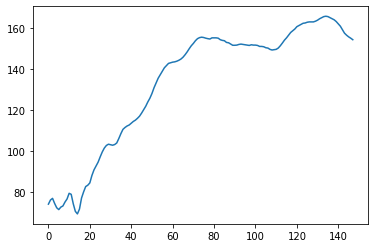

In [12]:
import matplotlib.pyplot as plt
plt.plot(hrdfs[0][0])
#plt.plot(BPM)
print(len(hrdfs[0][0]))

## Compute heart rate 

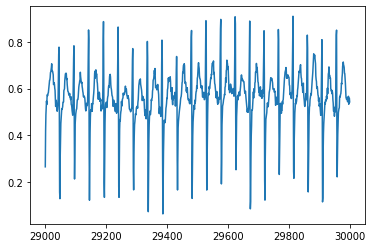

In [13]:
ECG0 = dfs[0][0]
plt.plot(ECG0[29000:30000])

In [14]:
# Check the length of data
len(ECG0)
dis = 1000 # 8 seconds
step = 250 # 2 seconds
#ECGseg = []
N = len(ECG0)
ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]


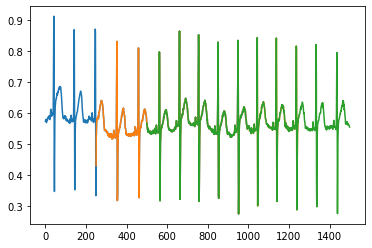

In [15]:
plt.plot(ECGseg[0])
plt.plot(ECGseg[1])
plt.plot(ECGseg[2])


24


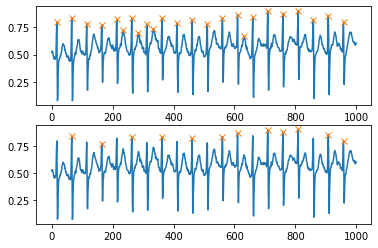

In [16]:
from scipy.signal import find_peaks
x = ECGseg[101].values
prom = 0.2
peaks, _ = find_peaks(x, prominence=prom)
peaks2, _ = find_peaks(x, prominence=prom, distance=50)
plt.subplot(211)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.subplot(212)
plt.plot(x)
plt.plot(peaks2, x[peaks2], "x")
Nbeat = len(peaks)

BPM = Nbeat
print(BPM)

### Detect R Peak using derivative and filtering
reference: **Peak Detection Algorithm for ECG wave**
  https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6255935

### STEP 1: DERIVATIVE

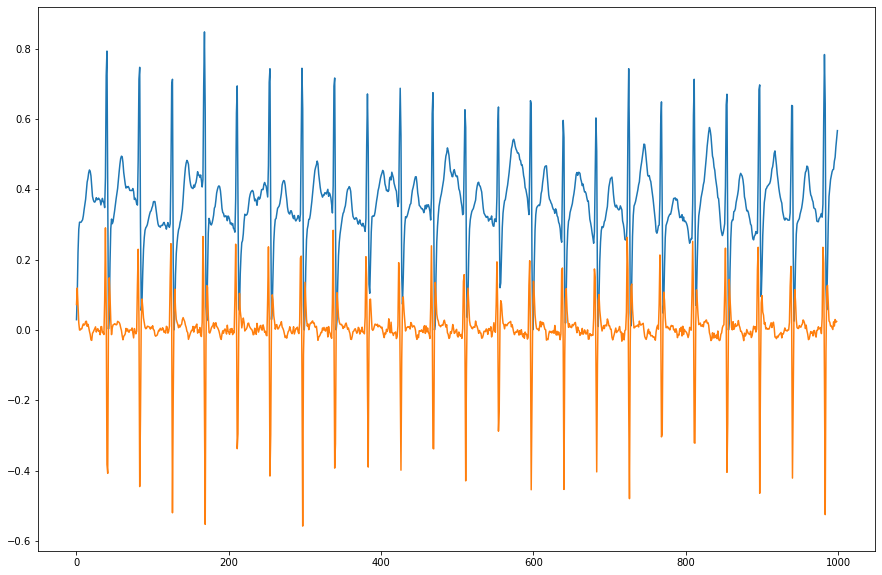

In [158]:
import numpy as np

# derivative
x = ECGseg[134].values
dx = np.diff(x)
plt.figure(figsize=(15,10))
plt.plot(x)
plt.plot(dx)

### STEP 2: BANDPASS FILTERING

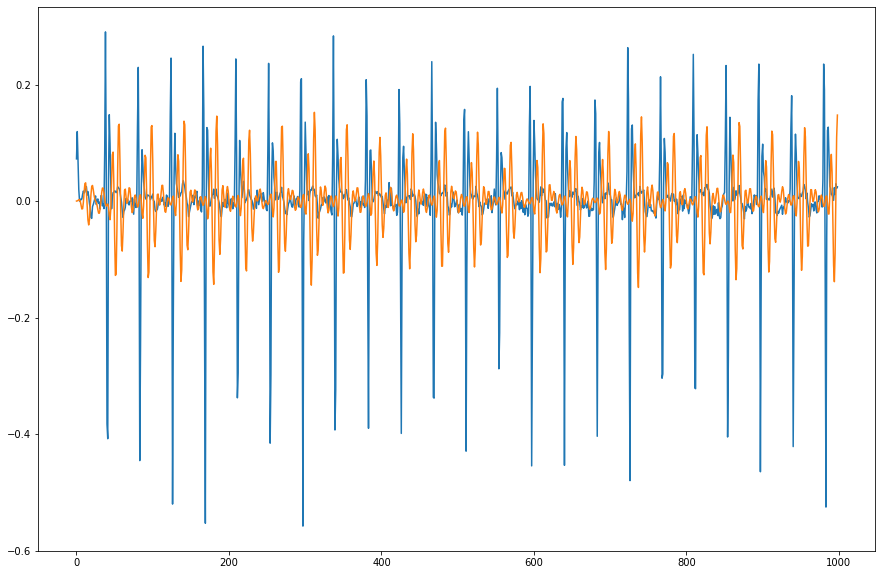

In [159]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

# insert a zero-buffer window of 200 points
#buff = np.asarray([0]*250)

#dx_buff = np.concatenate((buff, dx))
fs = 125
lowcut = 8
highcut = 18
N = 5 # in the paper is 20
y = butter_bandpass_filter(dx, lowcut, highcut, fs, order= N)

plt.figure(figsize=(15,10))
plt.plot(dx)
plt.plot(y)

### STEP 3: SQUARE FILTERED SIGNAL $X^2$

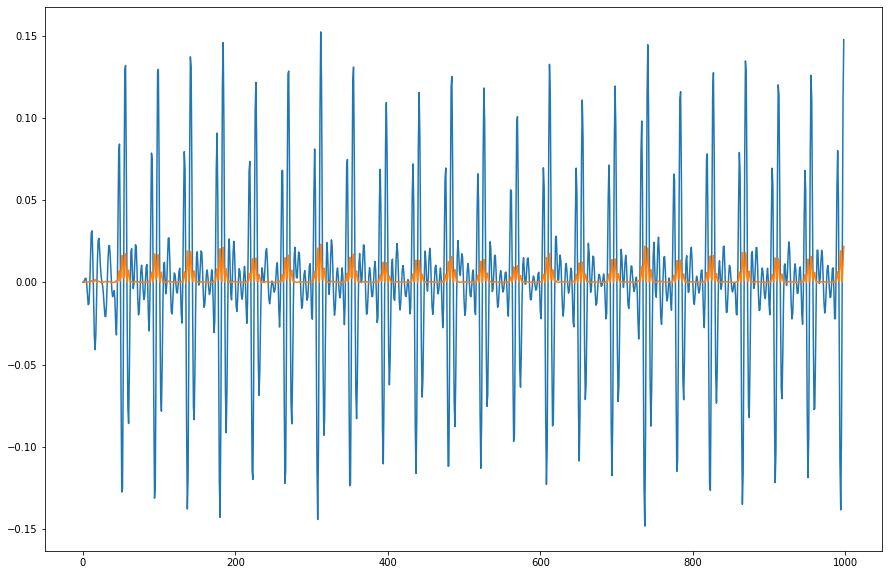

In [160]:
import pandas as pd

dx2 = np.square(y)
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(dx2)

### STEP 4: Entropy normalized

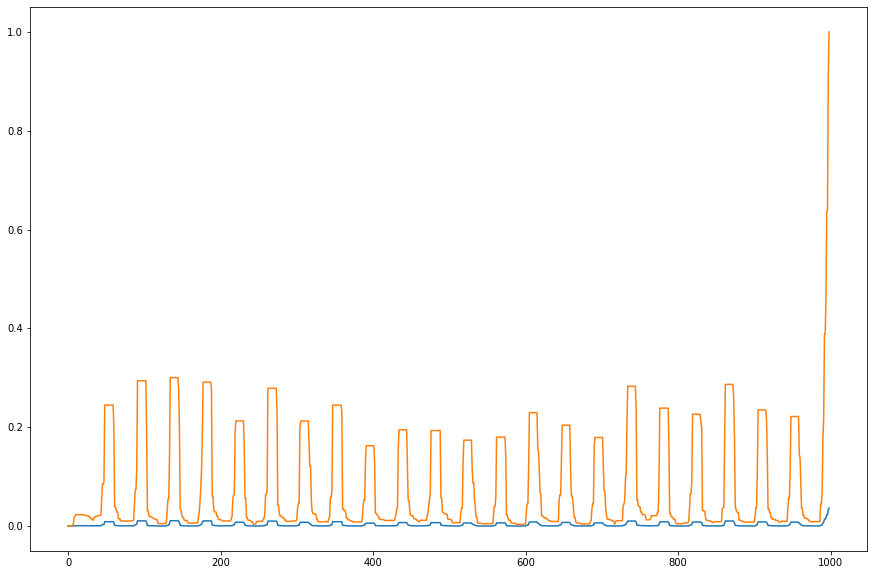

In [166]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

sn = [-t*np.log10(t) for t in dx2]
#sn = medfilt(np.asarray(sn),21)
sn = medfilt3(np.asarray(sn),7,21, method='median')
#sn = [-t*np.log10(t) for t in sn]
scaler = MinMaxScaler()

data = pd.DataFrame(sn).fillna(0)
dx2_norm = scaler.fit_transform(data)
# reshape to 1-D
dx2_norm = np.reshape(dx2_norm, -1)
#dx2_norm[dx2_norm < 0.2] = 0

plt.figure(figsize=(15,10))
plt.plot(sn)
plt.plot(dx2_norm)

### Simple Median Filter 

In [17]:
def medfilt (x, k):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert k % 2 == 1, "Median filter length must be odd."
    assert x.ndim == 1, "Input must be one-dimensional."
    k2 = (k - 1) // 2
    y = np.zeros ((len (x), k), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    return np.median (y, axis=1)

    


### Two-Level Median Filter 

In [18]:
def medfilt3 (x, kmin, kmax, method='mean'):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert kmin % 2 == 1 and kmax%2==1, "Median filter length must be odd."
    assert kmin <= kmax, "k1 must be smaller than k2"
    assert x.ndim == 1, "Input must be one-dimensional."
    ### Giai thuat co hai lua chon, dung Mean 2 tang/ Median 2 Tang
    K1 = np.mean(x)
    #Xn = x - K1
    
    Xn = x
    y = np.zeros(len(x))
    if (method is'mean'):
      y1 = np.zeros(len(x))
      for i in range(len(Xn)):
        z = subCopy(Xn,kmin,i) # window 1
        y1[i] = np.mean(z) #mean X1(:,j)
      for i in range(len(y1)):
        z = subCopy(y1,kmax,i) # window 2
        y[i] = np.mean(z) #mean X2(:,j)
    else: # method ='median'
      y1 = np.zeros(len(x))
      for i in range(len(Xn)):
        z = subCopy(Xn,kmin,i) # window 1
        y1[i] = np.median(z) #mean X1(:,j)
      for i in range(len(y1)):
        z = subCopy(y1,kmax,i) # window 2
        y[i] = np.median(z) #mean X2(:,j)
    
    K2 = np.mean(y)
    
    return y



    #return np.median (y, axis=1)

def subCopy(x,k,i):
  #k is windows length, i is position in x and in range(0, len(x))
  k2 = (k-1)//2
  z = np.zeros(k) ### length k elements
  if i - k2 <0:
     z[k2-i:]= x[0:k-k2+i]
     z[0:k2-i]=x[0]
    #print(z)
  elif i + k2 > len(x)-1:
     z[:k-k2 - i +len(x)-1]=x[-k + k2 +i-len(x)+1:]
     z[k-k2 -i+len(x)-1:] = x[-1]
  else:
     z = x[i-k2:i+k2+1]
  return z

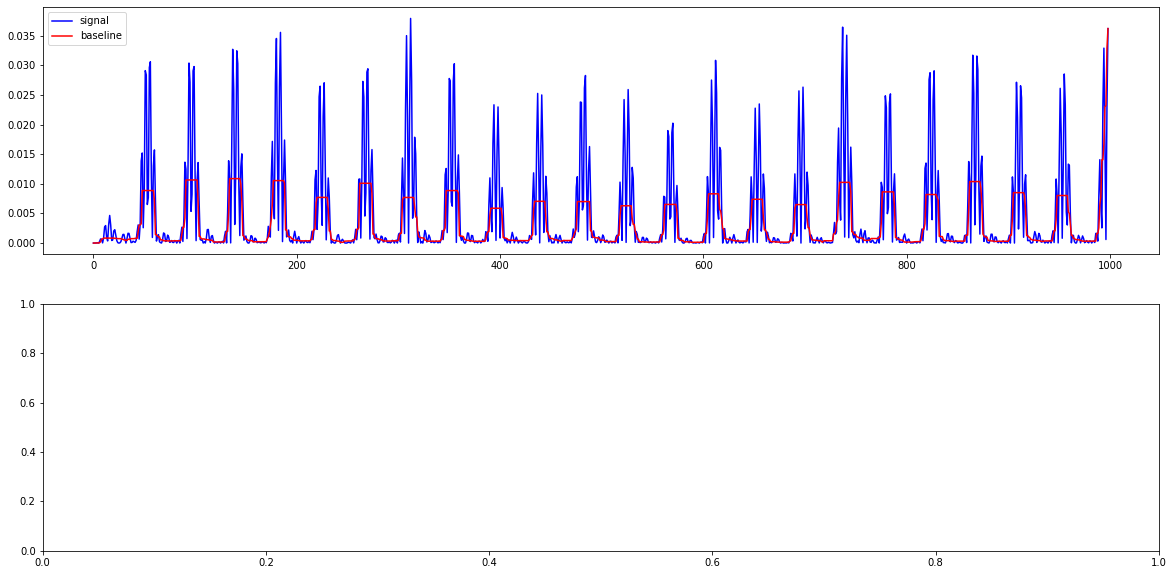

In [164]:
sn1 = medfilt3(np.asarray(sn),7,21, method='median')
plt.subplots(2,1,figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(sn, "b-", label="signal")
plt.plot(sn1, "r-", label="baseline")
plt.legend()

### STEP 5: LINEAR ZERO-PHASE FILTER

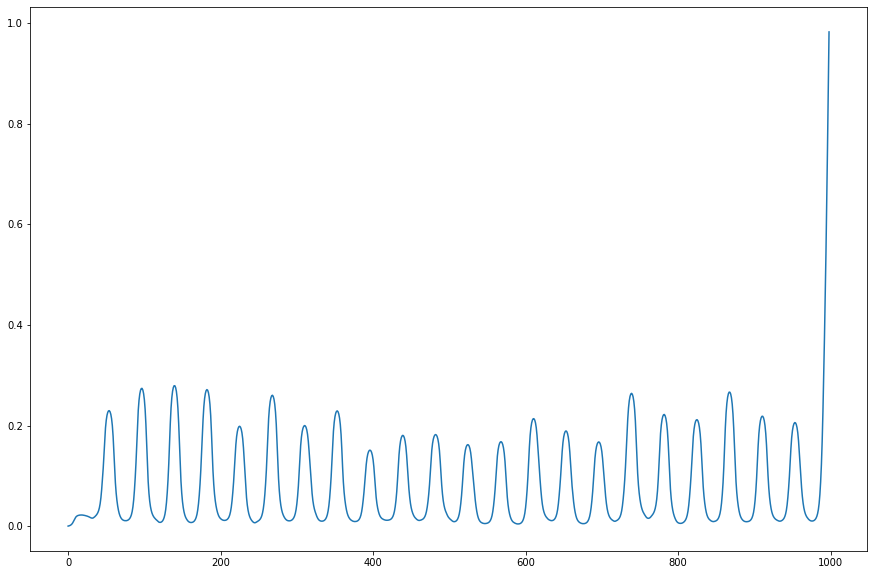

In [167]:
from scipy.signal import filtfilt
# Create an order 3 lowpass butterworth filter.
b, a = butter(1, 0.125)

sn_filt = filtfilt(b, a, dx2_norm, irlen=25)

plt.figure(figsize=(15,10))
#plt.plot(dx2_norm)
plt.plot(sn_filt)


22


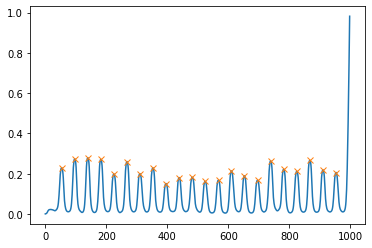

In [168]:
from scipy.signal import find_peaks 

peaks, _ = find_peaks(sn_filt, prominence=0.05)


plt.plot(sn_filt)
plt.plot(peaks, sn_filt[peaks], "x")

Nbeat = len(peaks)
print(Nbeat)

## Function detect peaks

In [19]:
import numpy as np
from scipy.signal import butter, sosfilt, sosfreqz, filtfilt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from scipy.signal import find_peaks 

#peaks, _ = find_peaks(sn_filt, prominence=0.2)

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

def medfilt3 (x, kmin, kmax, method='mean'):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert kmin % 2 == 1 and kmax%2==1, "Median filter length must be odd."
    assert kmin <= kmax, "k1 must be smaller than k2"
    assert x.ndim == 1, "Input must be one-dimensional."
    ### Giai thuat co hai lua chon, dung Mean 2 tang/ Median 2 Tang
    K1 = np.mean(x)
    #Xn = x - K1
    
    Xn = x
    y = np.zeros(len(x))
    if (method is'mean'):
      y1 = np.zeros(len(x))
      for i in range(len(Xn)):
        z = subCopy(Xn,kmin,i) # window 1
        y1[i] = np.mean(z) #mean X1(:,j)
      for i in range(len(y1)):
        z = subCopy(y1,kmax,i) # window 2
        y[i] = np.mean(z) #mean X2(:,j)
    else: # method ='median'
      y1 = np.zeros(len(x))
      for i in range(len(Xn)):
        z = subCopy(Xn,kmin,i) # window 1
        y1[i] = np.median(z) #mean X1(:,j)
      for i in range(len(y1)):
        z = subCopy(y1,kmax,i) # window 2
        y[i] = np.median(z) #mean X2(:,j)
    
    K2 = np.mean(y)
    
    return y

def subCopy(x,k,i):
  #k is windows length, i is position in x and in range(0, len(x))
  k2 = (k-1)//2
  z = np.zeros(k) ### length k elements
  if i - k2 <0:
     z[k2-i:]= x[0:k-k2+i]
     z[0:k2-i]=x[0]
    #print(z)
  elif i + k2 > len(x)-1:
     z[:k-k2 - i +len(x)-1]=x[-k + k2 +i-len(x)+1:]
     z[k-k2 -i+len(x)-1:] = x[-1]
  else:
     z = x[i-k2:i+k2+1]
  return z

def peak_count(ecg, w=0.2,fs = 125, lowcut = 8, highcut = 18, order=5, threshold=0.2):
  # Step 1: derivative
  dx = np.diff(ecg)
  # Step 2: filtering using bandpass filtering
  y = butter_bandpass_filter(dx, lowcut, highcut, fs, order= order)
  # Step 3: square signal
  dx2 = np.square(y)
  # Step 4: Enntroy Normalized
  sn = [-t*np.log10(t) if t!=0 else 0 for t in dx2 ]
  #sn = medfilt(np.asarray(sn),21)
  sn = medfilt3(np.asarray(sn),7,21, method='median')

  scaler = MinMaxScaler()

  data = pd.DataFrame(sn).fillna(0)
  dx2_norm = scaler.fit_transform(data)
    # reshape to 1-D
  dx2_norm = np.reshape(dx2_norm, -1)
    # remove value below threshold
  ###dx2_norm[dx2_norm < threshold] = 0
  # Step 5: linear zero-phase filtering
  #Create an order 3 lowpass butterworth filter.
  b, a = butter(1, 0.125)
  sn_filt = filtfilt(b, a, dx2_norm)
  # Step 6: detect peak
  peaks, _ = find_peaks(sn_filt, prominence=w)
  return len(peaks)

### Test function

In [20]:
ECG0 = dfs[10][0]
# Check the length of data
len(ECG0)
dis = 1000 # 8 seconds
step = 250 # 2 seconds
#ECGseg = []
N = len(ECG0)
ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]



In [21]:
BPM = []
weight = 0.2

for ecg in ECGseg[:]:
  n = peak_count(ecg, w=0.05)
  bpm = n*7.5    
  BPM.append(bpm)


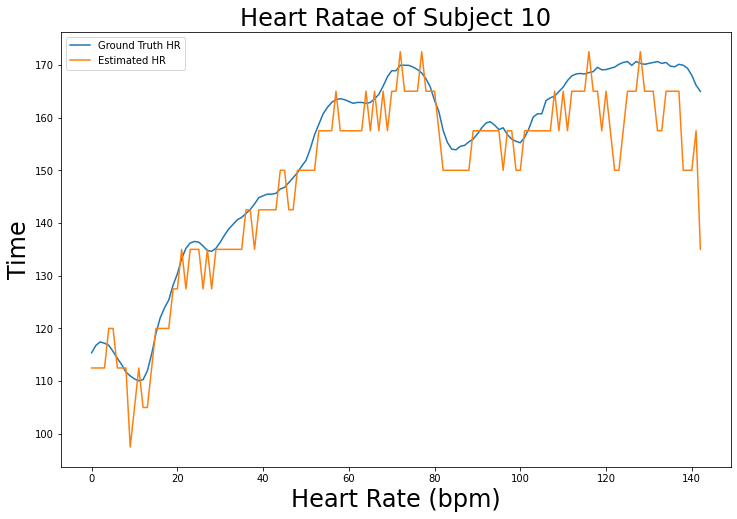

In [22]:
plt.figure(figsize=(12,8))

plt.plot(hrdfs[10][0])
plt.plot(BPM)

plt.title('Heart Ratae of Subject ' + str(10), fontdict={'fontsize':24})
plt.xlabel('Heart Rate (bpm)', fontdict={'fontsize':24})
plt.ylabel('Time', fontdict={'fontsize':24})
plt.legend(['Ground Truth HR', 'Estimated HR'])

### Print all results of detect

### None-Using Median Filter

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

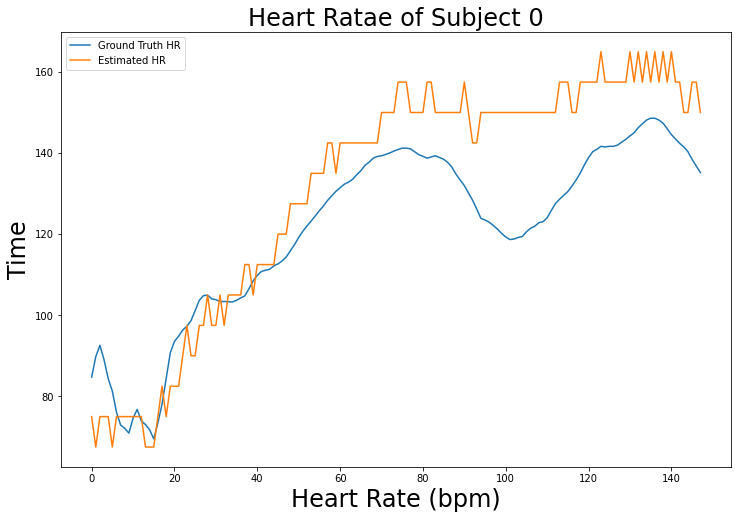

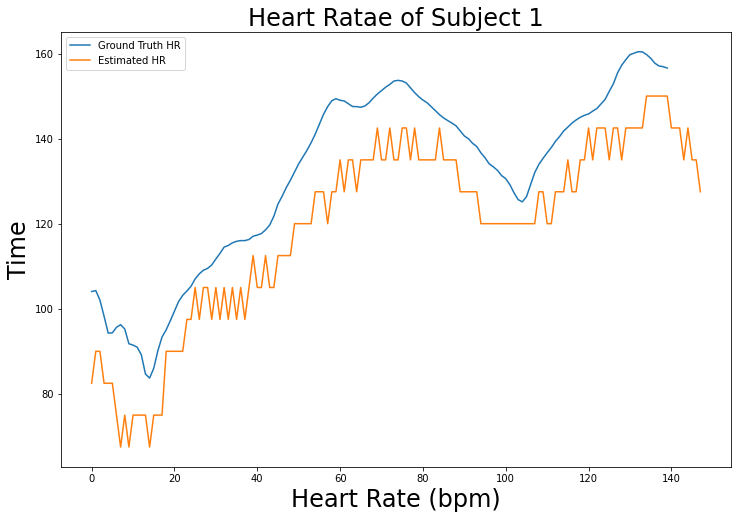

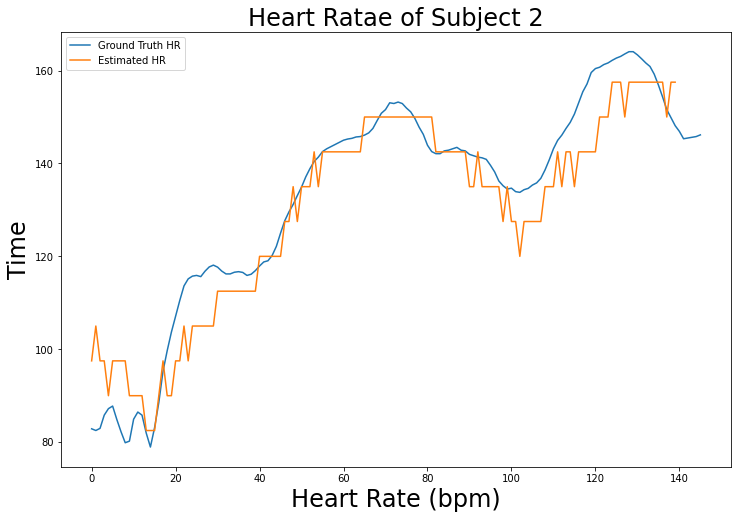

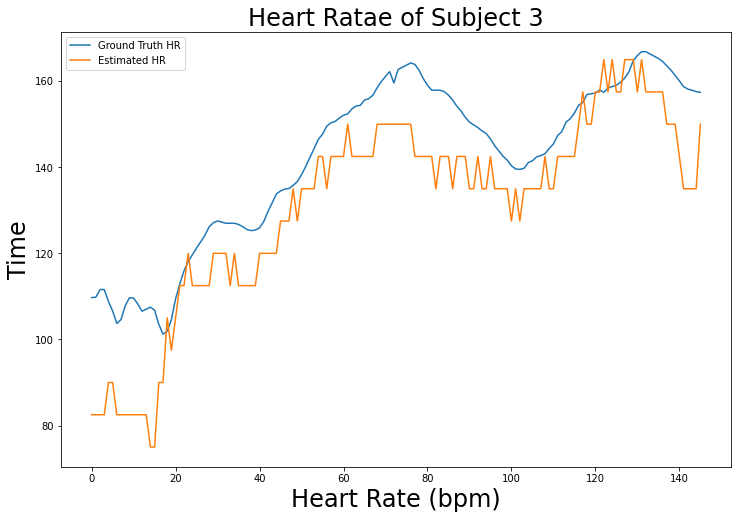

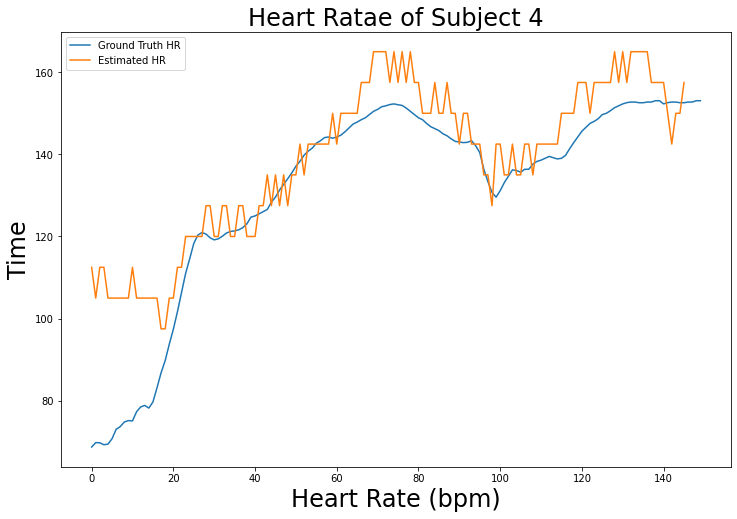

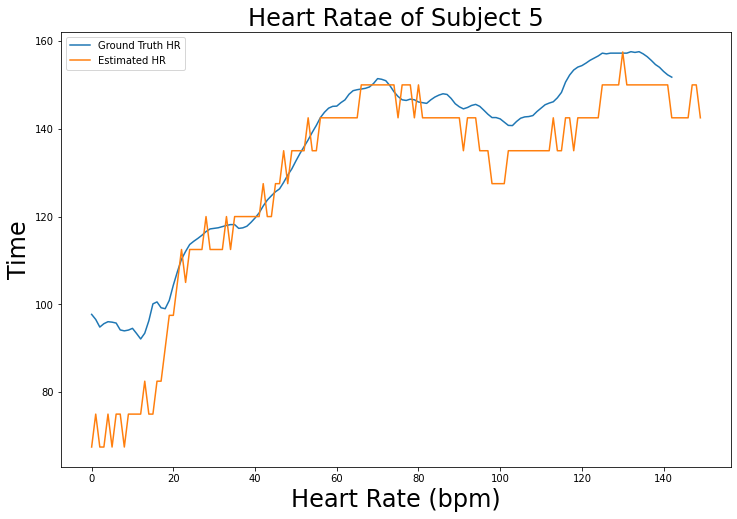

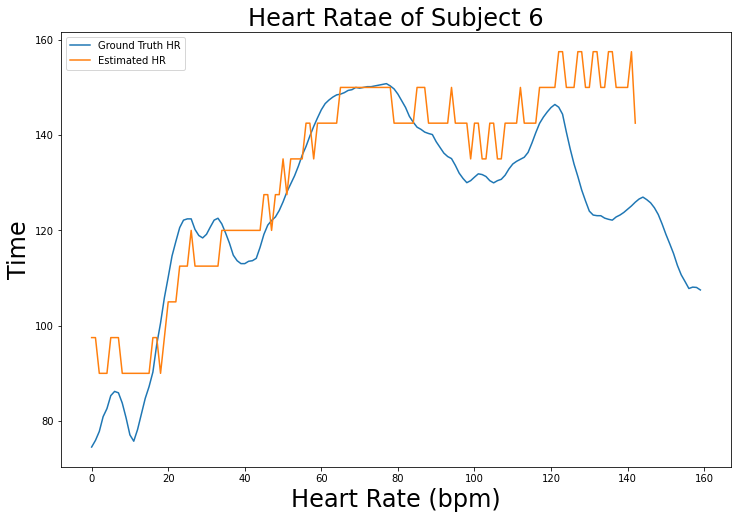

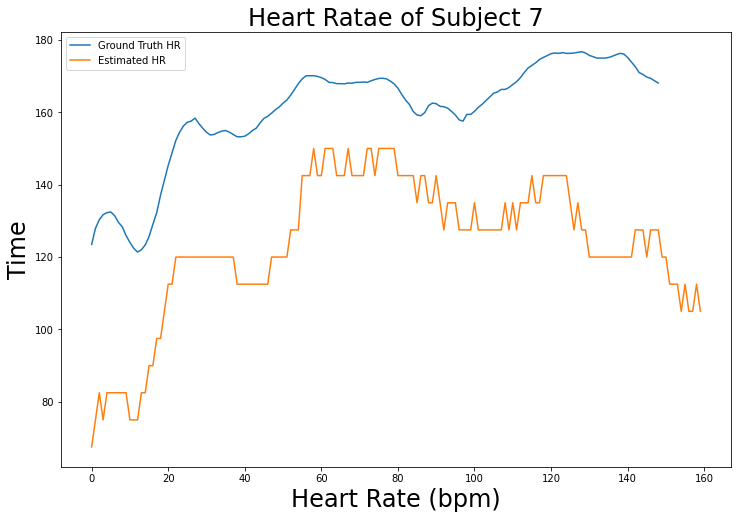

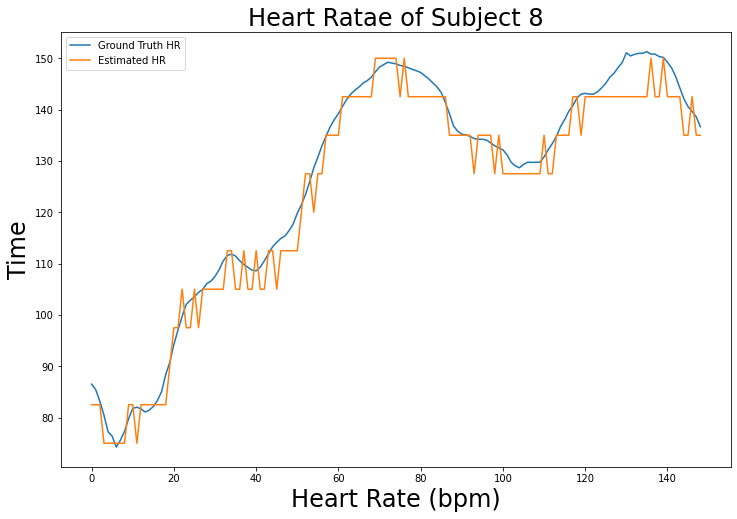

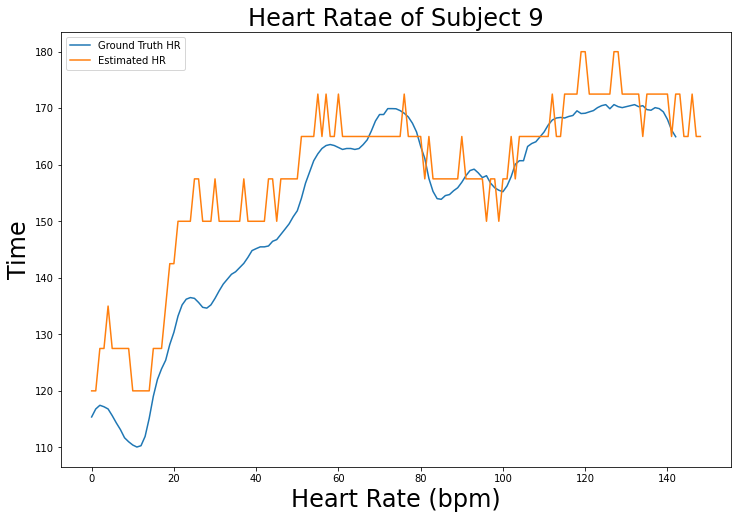

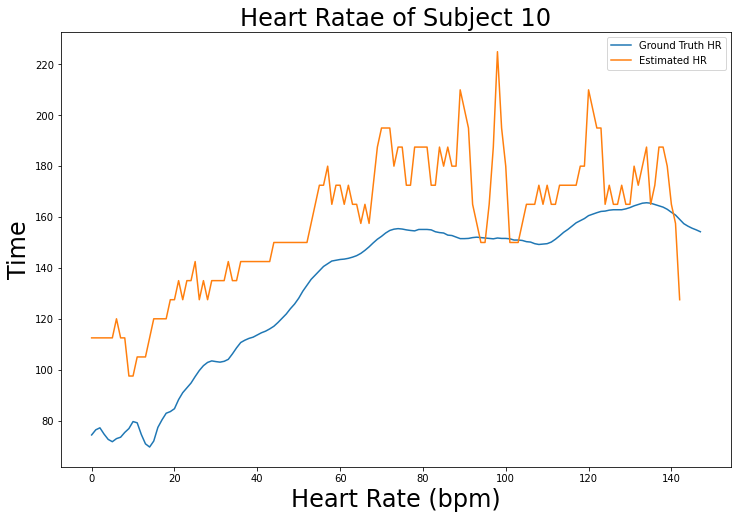

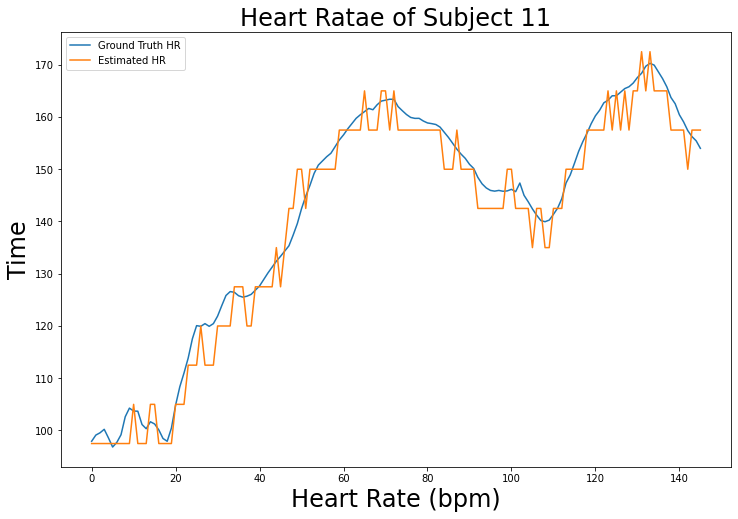

In [89]:
dis = 1000 # 8 seconds
step = 250 # 2 seconds
for i in range(0, np.size(dfs)):
  # Segment ecg data
  ECG0 = dfs[i][0]
  N = len(ECG0)
  ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]
  
  #count beat
  BPM = []
  for ecg in ECGseg[:]:
    n = peak_count(ecg, w=0.05)
    bpm = n*7.5    
    BPM.append(bpm)
  
  plt.figure(i)
  plt.figure(figsize=(12,8))

  plt.plot(hrdfs[i][0])
  plt.plot(BPM)

  plt.title('Heart Ratae of Subject ' + str(i), fontdict={'fontsize':24})
  plt.xlabel('Heart Rate (bpm)', fontdict={'fontsize':24})
  plt.ylabel('Time', fontdict={'fontsize':24})
  plt.legend(['Ground Truth HR', 'Estimated HR'])

  

### Using Median Filter

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

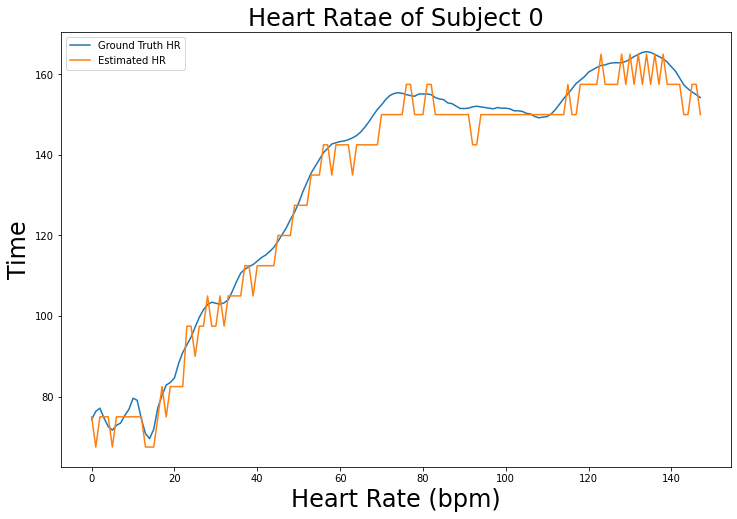

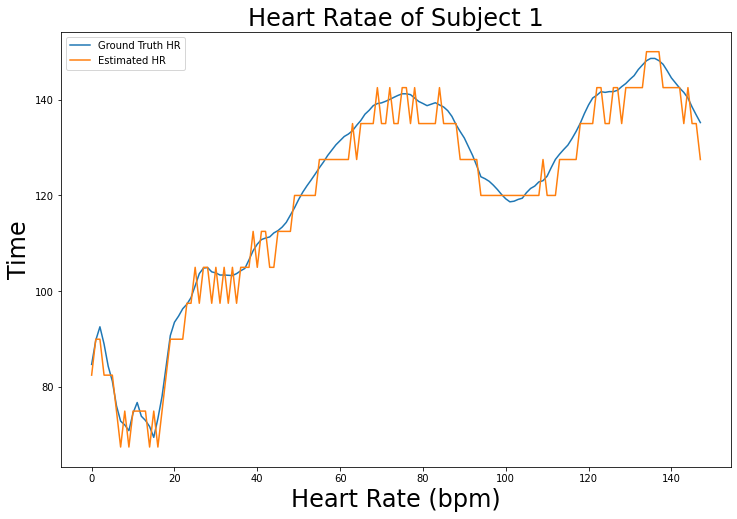

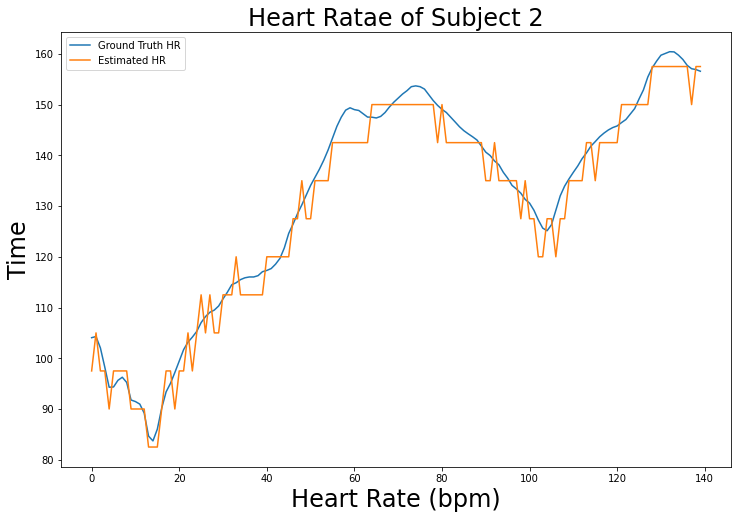

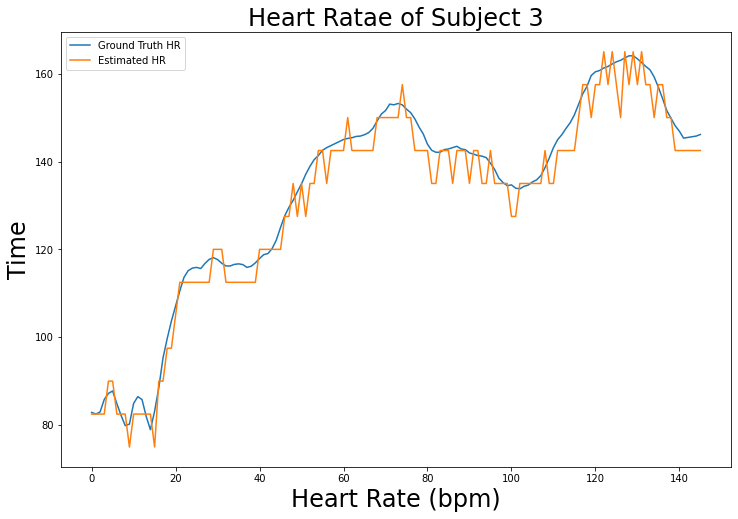

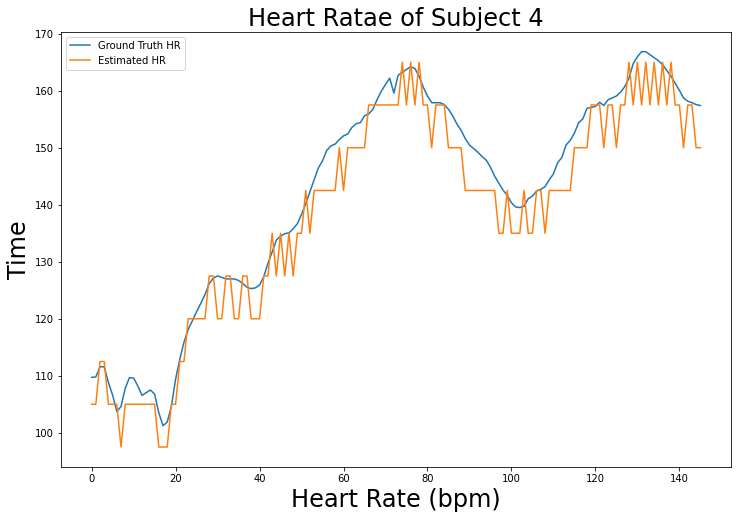

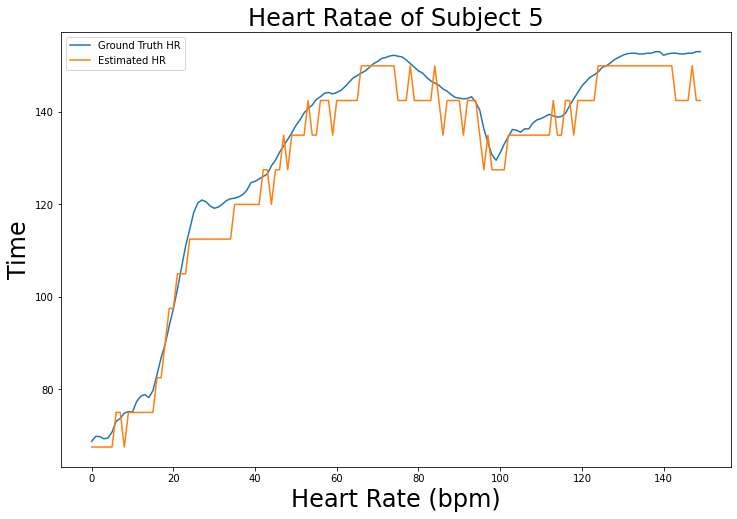

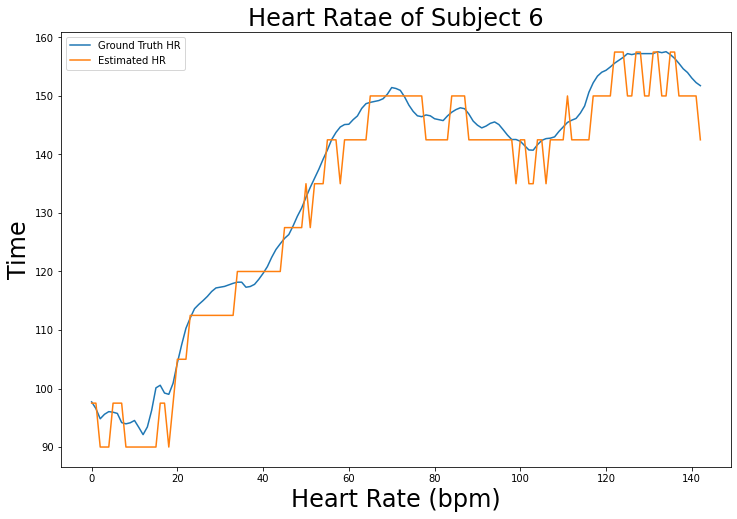

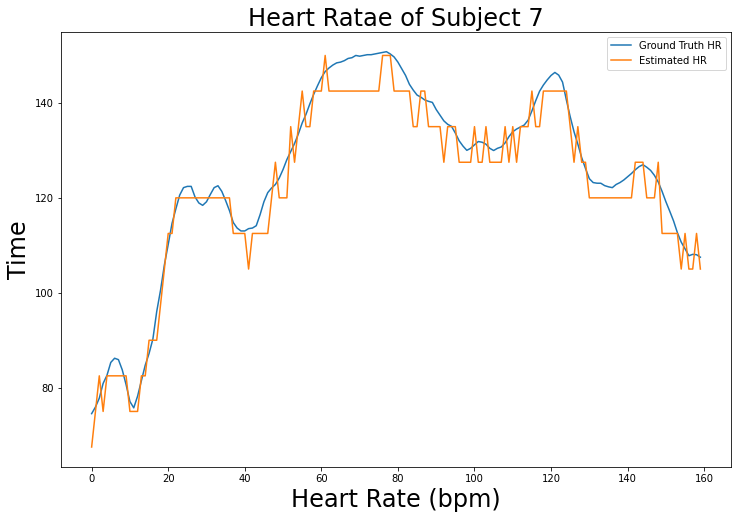

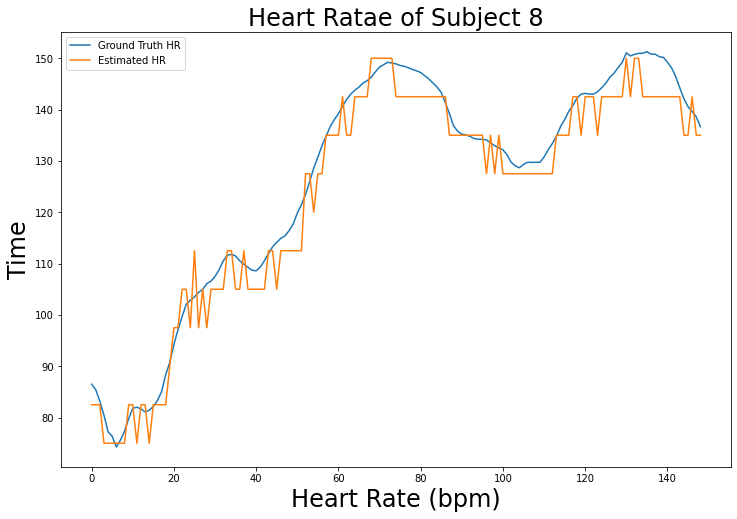

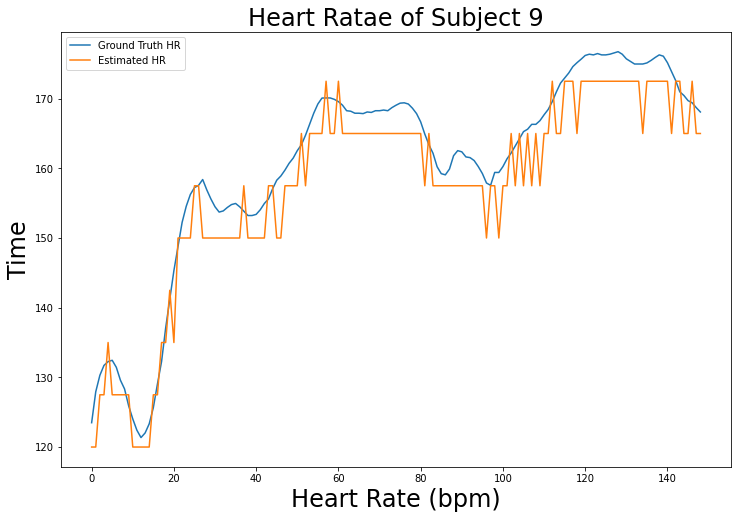

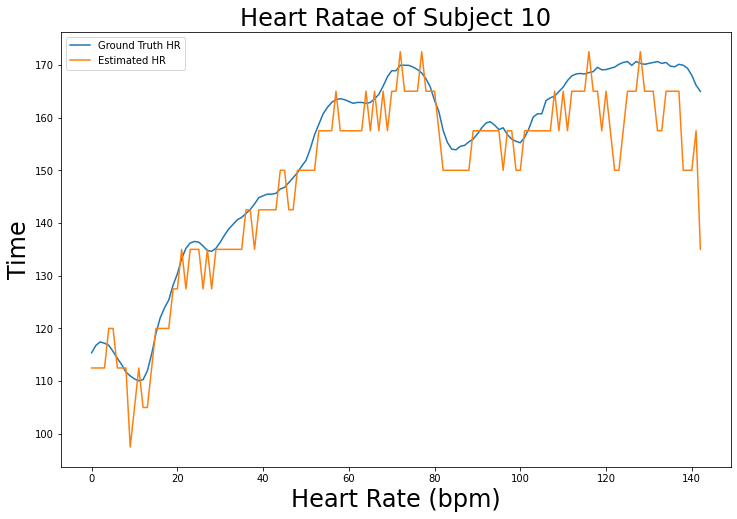

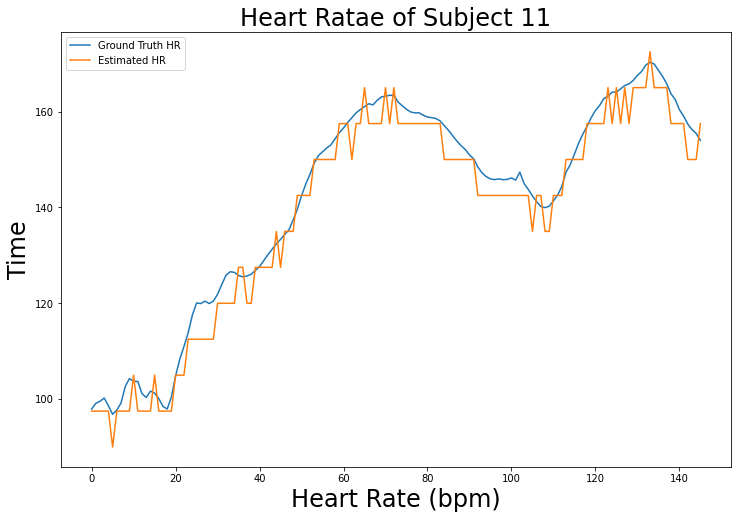

In [74]:
dis = 1000 # 8 seconds
step = 250 # 2 seconds
bpmData = [] ### Data for estimate heart rate
for i in range(0, np.size(dfs)):
  # Segment ecg data
  ECG0 = dfs[i][0]
  N = len(ECG0)
  ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]
  
  #count beat
  BPM = []
  for ecg in ECGseg[:]:
    n = peak_count(ecg, w=0.05)
    bpm = n*7.5    
    BPM.append(bpm)

  bpmData.append(BPM)

  plt.figure(i)
  plt.figure(figsize=(12,8))

  plt.plot(hrdfs[i][0])
  plt.plot(BPM)

  plt.title('Heart Ratae of Subject ' + str(i), fontdict={'fontsize':24})
  plt.xlabel('Heart Rate (bpm)', fontdict={'fontsize':24})
  plt.ylabel('Time', fontdict={'fontsize':24})
  plt.legend(['Ground Truth HR', 'Estimated HR'])

In [74]:
np.size(dfs)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


12

In [157]:
BPM[100:].index(min(BPM[100:]))

34

In [105]:
peak_count(ECGseg[95], w=0.05)

20

In [ ]:
import numpy as np
a = np.diff(peaks)
print(a)
print(peaks)
np.std(a), np.median(a)

[102 108 114 106 107 101  99  99]
[100 202 310 424 530 637 738 837 936]


(4.873397172404482, 104.0)

In [ ]:
def select_weight(ecg, weight=0.2):
  Nset = []
  D = []
  Dmin= []
  Dmax= []
  #rang = [weight + i*0.05 for i in range(-1,6)]
  W = []
  w = 0.1
  # initialize for first iteration
  while(1):

  #for w in rang:
    peaks, _ = find_peaks(ecg, prominence=w)
    if len(peaks) > 2:
      a = np.diff(peaks)
      D.append(np.std(a))
      Dmin.append(min(a))
      Dmax.append(max(a))
      Nset.append(len(peaks))
    else:
      break
    print(w)
    W.append(w)
    w= w+0.05
    
    
  return Nset, D, Dmin, Dmax, W

In [ ]:
print(select_weight(ECGseg[47]))

In [ ]:
BPM = []
weight = 0.2
i = 0
peaks, _ = find_peaks(ECGseg[0], prominence=weight)
Nlast= 15 #len(peaks) 17
dmed = 62
for ecg in ECGseg[45:50]:
  peaks, _ = find_peaks(ecg, prominence=weight)
  ### Check peaks in range [5 - 65]
  while len(peaks)<=5 or len(peaks) >= 65:
    if len(peaks) <= 5:
      weight = weight + 0.05
    if len(peaks) >=60:
      weight = weight - 0.05
    peaks, _ = find_peaks(ecg, prominence=weight)
  
  ### find optimal weight that minimum std
  a = np.diff(peaks)
  while not( np.std(a) <= 5 and np.abs(len(peaks) - Npre) <=3):
    




  ### Check std
  
      
  print(weight)
  a = np.diff(peaks)
  bpm = len(peaks)*7.5
  BPM.append(bpm)
  print(i)
  i = i + 1
plt.plot(BPM)

In [ ]:
 np.median(np.diff(peaks))*2 < max(np.diff(peaks))

In [ ]:
np.median(np.diff(peaks)), max(np.diff(peaks)), np.median(x[peaks]), len(peaks)

In [ ]:
plt.boxplot(x[peaks])

In [ ]:
ECG0[]

### Adaptive detect peaks
* default prominence w=0.2
* if the distance between outline will adapt the weight
** Increasing weight if many peaks detects
** Decreasing weight if less peaks detects

0.25
0.3
0.25
0.2


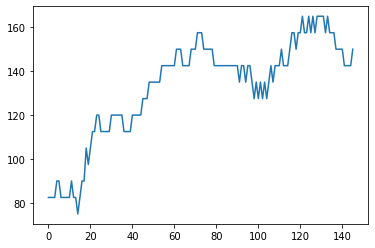

In [ ]:
BPM = []
weight = 0.2
#i = 0
for ecg in ECGseg[:]:
  peaks, _ = find_peaks(ecg, prominence=weight)
  a = np.diff(peaks)
  while not (2*min(a) > np.median(a) and np.median(a)*2 > max(a)):
    if 2*min(a) <np.median(a): 
      #print('go 1')
      weight = weight + 0.05
      peaks, _ = find_peaks(ecg, prominence=weight)
      if np.median(np.diff(peaks))*2 <= max(np.diff(peaks)):
        #print('go 1a')
        weight = weight - 0.05 # back to the old values
        peaks, _ = find_peaks(ecg, prominence=weight, distance= int(np.median(a)*0.9))
        if np.median(np.diff(peaks)) > 2*min(np.diff(peaks)):
          #print('go break')
          weight = 0.2
          break
      #distance= np.mean(a)*0.9
    #a = np.diff(peaks)  
    if np.median(a)*2 <= max(a): 
      #print('go 2')
      weight = weight - 0.05
      peaks, _ = find_peaks(ecg, prominence=weight)
      if np.median(np.diff(peaks)) > 2*min(np.diff(peaks)):
        #print('go 2a')
        weight = weight + 0.05 # back to the old values
        peaks, _ = find_peaks(ecg, prominence=weight, distance= int(np.median(a)*0.9))
        if 2*np.median(np.diff(peaks)) <= max(np.diff(peaks)):
          #print('go break')
          weight = 0.2
          break
    print(weight)
    a = np.diff(peaks)
  bpm = len(peaks)*7.5
  BPM.append(bpm)
  #print(i)
  #i = i + 1
plt.plot(BPM)

148


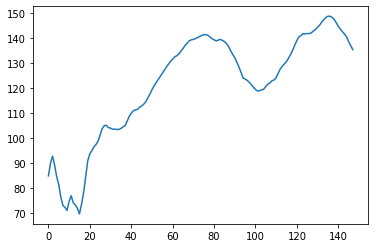

In [23]:
import matplotlib.pyplot as plt
plt.plot(hrdfs[1][0])
print(len(hrdfs[0][0]))


## Deep Learning Regression Model 

In [27]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data',delim_whitespace=True, header=None )
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [28]:
dataset = data.values

# split into input(X) and output (Y) variables
X = dataset[:, 0:13]
Y = dataset[:, 13]


### Model

In [29]:
def baseline_model():
  # create model
  model = Sequential()          
  model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model



In [31]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" %(results.mean(), results.std()))

Baseline: -31.85 (20.27) MSE


## Using Pipeline in Model 

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
estimator = []
estimator.append(('standardize', StandardScaler()))
estimator.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimator)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('Standardized: %.2f (%.2f) MSE' % (results.mean(), results.std()))

Standardized: -30.32 (27.03) MSE


## Tune Neural Network Topology

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [44]:
def larger_model():
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
# evaluate model with standardized dataset
estimator = []
estimator.append(('standardize', StandardScaler()))
estimator.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimator)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('Larger: %.2f (%.2f) MSE'%(results.mean(), results.std()))

Larger: -21.02 (23.10) MSE


## Evaluate a Wider Network Topology

In [46]:
# Regression Example With Boston Dataset: Standardized and Wider
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -22.35 (25.54) MSE


## CNN + LSTM model


In [53]:
import pandas
import keras
from keras import Model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Conv1D, Dense, MaxPooling1D, LSTM, Convolution1D, Reshape, Flatten

In [56]:
def baseline_model():
  #create model
  inputs = keras.Input(shape=(1000,1))
  conv1 = Conv1D(filters=32, kernel_size=30, activation='selu')(inputs)
  mxp1 = MaxPooling1D(4)(conv1)
  conv2 = Conv1D(filters=32, kernel_size=50,activation='selu')(mxp1)
  mxp2 = MaxPooling1D(4)(conv2)
  lstm1 = LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1)(mxp2)
  lstm2 = LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1)(lstm1)
  dense1 = Dense(2,  activation='selu')(lstm2)
  dense1 = Flatten()(dense1)
  outputs = Dense(1, kernel_initializer='normal')(dense1)
  model = Model(inputs=inputs, outputs=outputs, name="CorNet")
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
  return model

### X, Y data

#### Segment dataset into M part, each part 1000 samples and Step is 250

In [70]:
def segment(dataframe, step=250, dis=1000):
  #dis = 1000 # 8 seconds
  #step = 250 # 2 seconds
  a= []
  for df in dataframe:
    N = np.shape(df)[0]
    temp = [df.iloc[(i*step):(i*step + dis)] for i in range(0,int(N/step)-3)]
    for ele in temp:
      a.append(ele)
  return a

In [71]:
dfseg = segment(dfs)

Check the length of segment data

In [72]:
np.shape(dfseg)

(1768, 1000, 7)

Check the length of bpm Data

In [92]:
count = 0
bpmSeg = []
for i in range(0,np.shape(bpmData)[0]):
  for bpm in bpmData[i]:
    bpmSeg.append(bpm)  
  count = count + np.size(bpmData[i])
print(count)
print(np.shape(bpmSeg))

1768
(1768,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


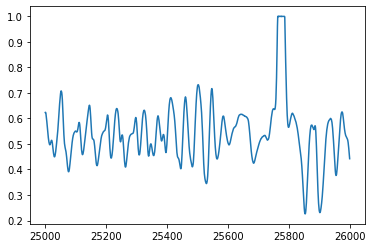

In [116]:
plt.plot(dfseg[100][2])

In [100]:
X = []
y = []
for i in range(0,np.shape(dfseg)[0]):
  X.append(dfseg[i][1].values) # PPG 1
  X.append(dfseg[i][2].values) # PPG 2
  y.append(bpmSeg[i]) # Label for subject n PPG1
  y.append(bpmSeg[i]) # Label for subject n PPG2
  

  #print(seg['Subject'][0])
X = np.array(X) 
y = np.asarray(y)

#### Reshape the data

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Xshuff, yshuff = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(Xshuff, yshuff, test_size=0.3, random_state=1)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [105]:
np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((2475, 1000, 1), (2475,), (1061, 1000, 1), (1061,))

In [ ]:
# evaluate model with standardized dataset
estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=25, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("CorNet: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
80/80 [==============================] - 37s 285ms/step - loss: 13937.2965 - accuracy: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 22s 272ms/step - loss: 580.2668 - accuracy: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 21s 264ms/step - loss: 563.3090 - accuracy: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 23s 283ms/step - loss: 572.2307 - accuracy: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 22s 270ms/step - loss: 574.0293 - accuracy: 0.0000e+00
Epoch 6/100
80/80 [==============================] - 21s 265ms/step - loss: 582.3524 - accuracy: 0.0000e+00
Epoch 7/100
80/80 [==============================] - 22s 281ms/step - loss: 551.8679 - accuracy: 0.0000e+00
Epoch 8/100
80/80 [==============================] - 22s 270ms/step - loss: 579.4975 - accuracy: 0.0000e+00
Epoch 9/100
80/80 [==============================] - 21s 268ms/step - loss: 565.1489 - accuracy: 0.0000e+00
Epoch 10/100
80/80 [======